# <center> Statistics Project </center>

### Group Members Details
### 1) V Hemanth Reddy (AI23BTECH11033)
### 2) Sattar Saif (MA23BTECH11023)
### 3) Anurag (MA23BTECH11004)

# Introduction
The COVID-19 pandemic has been one of the most significant global health crises in recent history, affecting millions of people worldwide. In this project, we tried to understand the trends and impact of the virus, we have collected datasets: "Weekly COVID-19 cases and deaths by date reported to WHO" and "Latest reported counts of COVID-19 cases and deaths" , which provide cumulative totals up to each reported week, from the World Health Organization (WHO) website. This dataset provides a comprehensive overview of how the pandemic evolved across different countries and regions. The data spans approximately 200 countries, covering various time periods, allowing us to analyze patterns, trends, and variations in the spread of the virus.

# About this Data
The dataset for this project has been sourced from the [World Health Organization (WHO) COVID-19 Dashboard](https://data.who.int/dashboards/covid19/data) and includes weekly reported cases and deaths, along with their cumulative totals. Since raw data often contains missing values, we have preprocessed the dataset to enhance its accuracy and usability for statistical analysis.

Our preprocessing steps included handling missing values, correcting inconsistencies, and structuring the data for better visualization. Specifically:

- We manually added WHO region names where they were missing.
- For missing weekly reported cases and deaths, we cross-verified online and confirmed that they represent 0 reported cases and deaths for that week.
- In the "Latest Reported Counts of COVID-19 Cases and Deaths" dataset, we removed the following columns:
    - `Cases - newly reported in last 7 days`
    - `Cases - newly reported in last 7 days per 100,000 population`
    - `Cases - newly reported in last 24 hours`
    - `Deaths - newly reported in last 7 days`
    - `Deaths - newly reported in last 7 days per 100,000 population`
    - `Deaths - newly reported in last 24 hours`
      
These columns were excluded because we are primarily working with data covering the entire duration of the pandemic, while these columns represent cases or deaths reported in the last 7 days or 24 hours on a specific date in the year 2025, which falls well beyond the pandemic period.

By applying these preprocessing steps, we have ensured that the dataset is clean, structured, and suitable for statistical analysis, allowing for meaningful insights into the trends and impact of COVID-19 cases and deaths worldwide. And the data set after preprocessing are presented below in the form of hyperlinks:
- [Cumulative WHO data](https://drive.google.com/file/d/1QhKfASYyud2iCIJ-y7xhLQqVF4ZIEoo5/view?usp=sharing)
- [Weekly reported WHO data](https://drive.google.com/file/d/1gUIyR6dC-gMqdmnQ5wST0yqaa4kdZOJu/view?usp=sharing)
  
These data sets can be accessed by IITH mail ID's only. 

# Objective of the Project
Our aim is to analyze the dataset using statistical techniques to:
1. Identify trends in the weekly rise of cases and deaths.
2. Compare COVID-19 impact across different WHO regions and across differnet time periods.
3. Use statistical measures like mean, median, and standard deviation to summarize the data.
4. Visualize the data using bar charts, line graphs, and box plots for better insights.

Through this project, we seek to understand how the pandemic evolved over time, how different regions were affected, and what statistical conclusions can be drawn from the WHO data.

# Importing Data and Setting Up Functions for Analysis

Before starting our analysis, we first need to load important python libraries, import the dataset and define functions to handle the data efficiently. By organizing our approach with reusable functions, we can efficiently manipulate the dataset and extract meaningful insights.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML
import random
import math
import csv
from scipy.stats import norm

In [2]:
def central_tendencies(data):
    mean = np.mean(data)
    median = np.median(data)
    values, counts = np.unique(data, return_counts=True)
    mode_index = np.argmax(counts)
    mode = values[mode_index]
    return round(mean,2), round(median,2), round(mode,2)

def dispersion(data):
    variance = np.var(data)
    std_dev = np.std(data)
    minimum = np.min(data)
    maximum = np.max(data)
    range1 = np.max(data) - np.min(data)
    quartile1 = np.percentile(data, 25)
    quartile3 = np.percentile(data, 75)
    interquartile_range = quartile3 - quartile1
    return round(variance,2), round(std_dev,2), round(minimum,2), round(maximum,2), round(range1,2), round(quartile1,2), round(quartile3,2), round(interquartile_range,2)

def stats_display(data):
    
    stats = {
        "Metric": [],
        "Mean": [],
        "Median": [],
        "Variance": [],
        "Standard Deviation": [],
        "Minimum": [],
        "Maximum": [],
        "Range": [],
        "Quartile 1": [],
        "Quartile 3": [],
        "Interquartile Range": []
    }
    
    metrics = {
        "Total Cases": data["Cases - cumulative total"],
        "Total Deaths": data["Deaths - cumulative total"],
        "Cases per 100K": data["Cases - cumulative total per 100000 population"],
        "Deaths per 100K": data["Deaths - cumulative total per 100000 population"],
    }
    
    for metric_name, metric_data in metrics.items():
        mean, median, mode = central_tendencies(metric_data)
        variance, std_dev, minimum, maximum, rnge, quartile1, quartile3, interquartile_range = dispersion(metric_data)
        
        stats["Metric"].append(metric_name)
        stats["Mean"].append(mean)
        stats["Median"].append(median)
        stats["Variance"].append(variance)
        stats["Standard Deviation"].append(std_dev)
        stats["Minimum"].append(minimum)
        stats["Maximum"].append(maximum)
        stats["Range"].append(rnge)
        stats["Quartile 1"].append(quartile1)
        stats["Quartile 3"].append(quartile3)
        stats["Interquartile Range"].append(interquartile_range)

    df = pd.DataFrame(stats)
    display(HTML(df.to_html(index=False)))
    


In [3]:
df = pd.read_csv("Weekly_covid_data.csv")

def stats_display2(data):
    
    stats = {
        "Metric": [],
        "Mean": [],
        "Median": [],
        "Variance": [],
        "Standard Deviation": [],
        "Minimum": [],
        "Maximum": [],
        "Range": [],
        "Quartile 1": [],
        "Quartile 3": [],
        "Interquartile Range": []
    }
    
    metrics = {
        "New Cases": data["New_cases"],
        "New Deaths": data["New_deaths"],
    }
    
    for metric_name, metric_data in metrics.items():
        mean, median, mode = central_tendencies(metric_data)
        variance, std_dev, minimum, maximum, rnge, quartile1, quartile3, interquartile_range = dispersion(metric_data)
        
        stats["Metric"].append(metric_name)
        stats["Mean"].append(mean)
        stats["Median"].append(median)
        stats["Variance"].append(variance)
        stats["Standard Deviation"].append(std_dev)
        stats["Minimum"].append(minimum)
        stats["Maximum"].append(maximum)
        stats["Range"].append(rnge)
        stats["Quartile 1"].append(quartile1)
        stats["Quartile 3"].append(quartile3)
        stats["Interquartile Range"].append(interquartile_range)

    df = pd.DataFrame(stats)
    display(HTML(df.to_html(index=False)))
    
def filter_year_data(df, year):
    df_year = df[df['Date_reported'].str.contains(str(year))]
    df_year_grouped = df_year.groupby('Date_reported')[['New_cases', 'New_deaths']].sum().reset_index()
    return df_year_grouped

In [4]:
s_data = []
with open("Cumulative_WHO_data.csv","r") as file:
    content = csv.reader(file)
    next(content)
    for line in content:
        line=np.array(line)
        
        x0  = line[0]                   #country
        x1  = line[1]                   #WHO region
        x2  = int(float(line[2]))       #Cases - cumulative total
        x3  = int(float(line[3]))       #Cases - cumulative total per 100000 population
        x4  = int(float(line[4]))       #Deaths - cumulative total
        x5  = int(float(line[5]))       #Deaths - cumulative total per 100000 population
        # print(line[0])
        
    
        s_data.append([x0,x1,x2,x3,x4,x5])

In [5]:
s_Continental_deaths = {'African': 0, 'Americas': 0, 'Eastern Mediterranean': 0, 'European': 0, 'South-East Asia': 0, 'Western Pacific': 0}
s_Continental_cases = {'African': 0, 'Americas': 0, 'Eastern Mediterranean': 0, 'European': 0, 'South-East Asia': 0, 'Western Pacific': 0}

for line in s_data:
    if line[1] == 'Africa':
        s_Continental_deaths['African'] += line[4]
        s_Continental_cases['African'] += line[2]
        
    if line[1] == 'Americas':
        s_Continental_deaths['Americas'] += line[4]
        s_Continental_cases['Americas'] += line[2]
        
    if line[1] == 'Eastern Mediterranean':
        s_Continental_deaths['Eastern Mediterranean'] += line[4]
        s_Continental_cases['Eastern Mediterranean'] += line[2]

    if line[1] == 'Europe':
        s_Continental_deaths['European'] += line[4]
        s_Continental_cases['European'] += line[2]

    if line[1] == 'South-East Asia':
        s_Continental_deaths['South-East Asia'] += line[4]
        s_Continental_cases['South-East Asia'] += line[2]
        
    if line[1] == 'Western Pacific':
        s_Continental_deaths['Western Pacific'] += line[4]
        s_Continental_cases['Western Pacific'] += line[2]
        


# print("Continental_deaths: ",s_Continental_deaths)
# print("Continental_cases: ", s_Continental_cases)

def s_autopct_format(pct):
    return f'{pct:f}%' if pct > 0 else '0%'

In [6]:
s_Weekly_data = []
with open("Weekly_covid_data.csv","r") as file:
    content = csv.reader(file)
    next(content)
    for line in content:
        x0  = line[0]                   #Date_reported
        x1  = line[1]                   #Country_code
        x2  = line[2]                   #Country
        x3  = line[3]                   #WHO_region
        x4  = int(float(line[4]))       #New_cases
        x5  = int(float(line[5]))       #Cumulative_cases
        x6  = int(float(line[6]))       #New_deaths
        x7  = int(float(line[7]))       #Cumulative_deaths
        
    
        s_Weekly_data.append([x0,x1,x2,x3,x4,x5,x6,x7])

In [7]:
s_yearly_cases = {'2020': 0, '2021': 0, '2022': 0, '2023': 0, '2024': 0}
s_yearly_deaths = {'2020': 0, '2021': 0, '2022': 0, '2023': 0, '2024': 0}

for line in s_Weekly_data:
    if '2020-' in line[0]:
        s_yearly_cases['2020'] += line[4]
        s_yearly_deaths['2020'] += line[6]
    
    if '2021-' in line[0]:
        s_yearly_cases['2021'] += line[4]
        s_yearly_deaths['2021'] += line[6]

    if '2022-' in line[0]:
        s_yearly_cases['2022'] += line[4]
        s_yearly_deaths['2022'] += line[6]

    if '2023-' in line[0]:
        s_yearly_cases['2023'] += line[4]
        s_yearly_deaths['2023'] += line[6]

    if '2024-' in line[0]:
        s_yearly_cases['2024'] += line[4]
        s_yearly_deaths['2024'] += line[6]

print(s_yearly_cases)
print(s_yearly_deaths)

{'2020': 80316790, '2021': 200297624, '2022': 424017189, '2023': 69155133, '2024': 3483531}
{'2020': 1897533, '2021': 3549358, '2022': 1248805, '2023': 319022, '2024': 68200}


In [8]:
df = pd.read_csv("Weekly_covid_data.csv")

s_weekly_cases = (df.groupby('Date_reported')['Cumulative_cases'].sum().reset_index())
s_cweek_cases = [item[1]  for item in s_weekly_cases.values.tolist()]

s_count =  {'2020': 0, '2021': 0, '2022': 0, '2023': 0, '2024': 0}

for item in s_weekly_cases.values.tolist():
    for key in s_count.keys():
        if key in item[0]:
            s_count[key] += 1

s_ccount =  {'2020': 0, '2021': 0, '2022': 0, '2023': 0, '2024': 0}

s_ccount['2020'] = s_count['2020']
s_ccount['2021'] = s_count['2020']+ s_count['2021']
s_ccount['2022'] = s_count['2020']+ s_count['2021']+s_count['2022']
s_ccount['2023'] = s_count['2020']+ s_count['2021']+s_count['2022']+s_count['2023']
s_ccount['2024'] = s_count['2020']+ s_count['2021']+s_count['2022']+s_count['2023']+s_count['2024']

s_weekly_deaths = (df.groupby('Date_reported')['Cumulative_deaths'].sum().reset_index())
s_cweek_deaths = [item[1]  for item in s_weekly_deaths.values.tolist()]
s_weeks = np.arange(1,len(s_cweek_cases)+1)
s_greater_than_cases = [s_cweek_cases[-1] - s_cweek_cases[i] for i in np.arange(len(s_cweek_cases))]
s_greater_than_deaths = [s_cweek_deaths[-1] - s_cweek_deaths[i] for i in np.arange(len(s_cweek_deaths))]

# print(s_cweek_cases)
# print(s_cweek_deaths)

In [9]:
h_data = pd.read_csv('Cumulative_WHO_data.csv')
h_total_cases=h_data["Cases - cumulative total"]
h_total_deaths=h_data["Deaths - cumulative total"]
h_per100_cases=h_data["Cases - cumulative total per 100000 population"]
h_per100_deaths=h_data["Deaths - cumulative total per 100000 population"]

In [10]:
a_summary_data=pd.read_csv('Cumulative_WHO_data.csv')

a_total_cases=a_summary_data['Cases - cumulative total']
a_total_cases_bins=[i for i in np.arange(0,100000000,2000000)]

a_total_deaths=a_summary_data['Deaths - cumulative total']
a_total_deaths_bins=[i for i in np.arange(0,500000,10000)]

a_cases_per_100k=a_summary_data['Cases - cumulative total per 100000 population']
a_cases_per_100k_bins=[i for i in np.arange(0,100000,5000)]

a_deaths_per_100k=a_summary_data['Deaths - cumulative total per 100000 population']
a_deaths_per_100k_bins=[i for i in np.arange(0,1000,50)]

# WHO Regional Analysis

The World Health Organization (WHO) classifies countries into six regions to effectively coordinate global health initiatives and manage public health data and we have chosen to analyze cumulative COVID-19 cases and deaths based on WHO regions rather than traditional continental divisions.


| **WHO Region**                   | **Abbreviation** | **Geographical Coverage**                             |
| -------------------------------- | ---------------- | ----------------------------------------------------- |
| **African Region**               | **AFRO**         | Most countries in Africa                              |
| **Region of the Americas**       | **AMRO**         | North, Central, and South America                     |
| **Eastern Mediterranean Region** | **EMRO**         | Middle East, North Africa, and parts of Central Asia  |
| **European Region**              | **EURO**         | Europe and parts of Central Asia                      |
| **South-East Asia Region**       | **SEARO**        | India, Indonesia, Thailand, and neighboring countries |
| **Western Pacific Region**       | **WPRO**         | China, Australia, Japan, and Pacific nations          |

Let’s start our analysis by exploring the cumulative cases and deaths reported across different WHO regions throughout the entire pandemic.

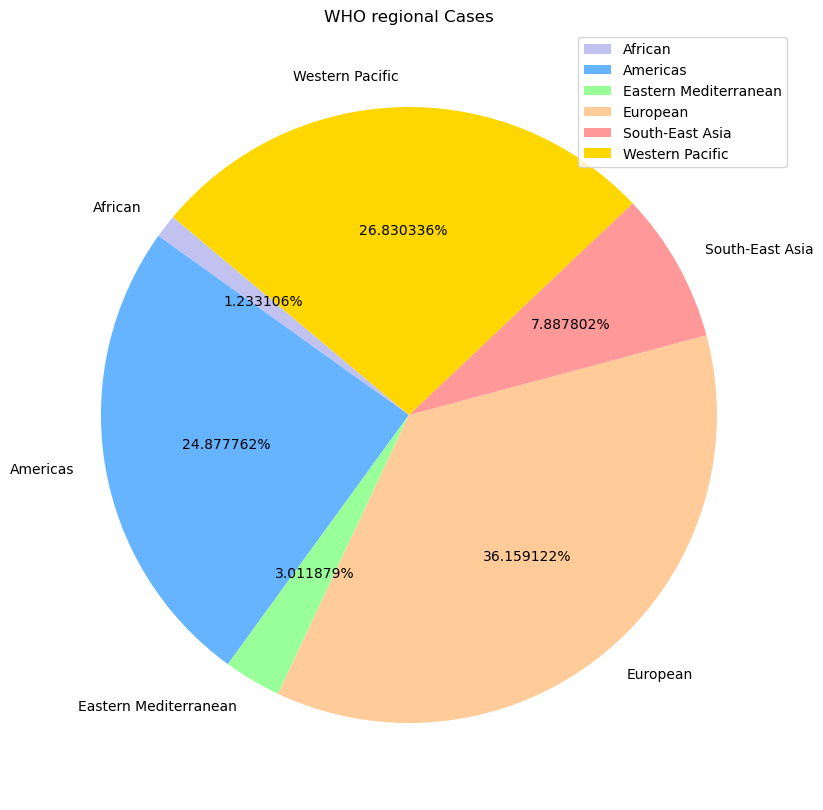

In [11]:
s_colors = ['#C2C2F0', '#66B3FF', '#99FF99', '#FFCC99', '#FF9999', '#FFD700']
plt.figure(figsize=(10, 10))
    
plt.pie(s_Continental_cases.values(), labels= s_Continental_cases.keys(), colors=s_colors, autopct=s_autopct_format, startangle=140)
plt.title("WHO regional Cases")
plt.legend()
plt.show()

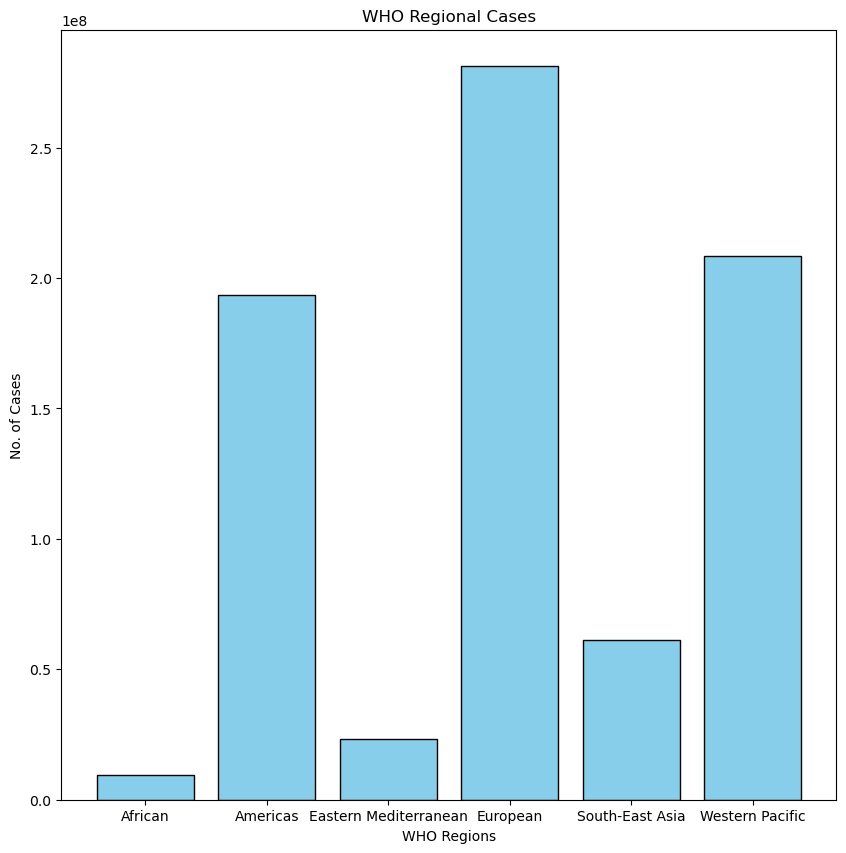

In [12]:
plt.figure(figsize=(10, 10))
    
plt.bar(s_Continental_cases.keys(), s_Continental_cases.values(), color='skyblue', edgecolor='black')
plt.title("WHO Regional Cases")
plt.xlabel("WHO Regions")
plt.ylabel("No. of Cases")
plt.show()

The pie chart and bar graph provide a clear representation of the distribution of COVID-19 cases across the six WHO regions throughout the entire pandemic period. From both graphs, it is evident that the European Region (EURO) had the highest number of reported cases, making up over one-third of the global case count. This is reflected in the bar graph’s tallest bar and the largest sector in the pie chart (36.16%). The Western Pacific Region (WPRO) and the Region of the Americas (AMRO) followed closely, with significant case counts, the Western Pacific Region (26.83%) had a high proportion of cases. The South-East Asia Region (SEARO) recorded fewer cases (7.89%), despite having highly populated countries like India and Indonesia. The Eastern Mediterranean Region (EMRO) reported an even smaller proportion of cases (3.01%). The African Region (AFRO) had the smallest share of reported cases (1.23%), which is consistent across both the pie chart and the bar graph.

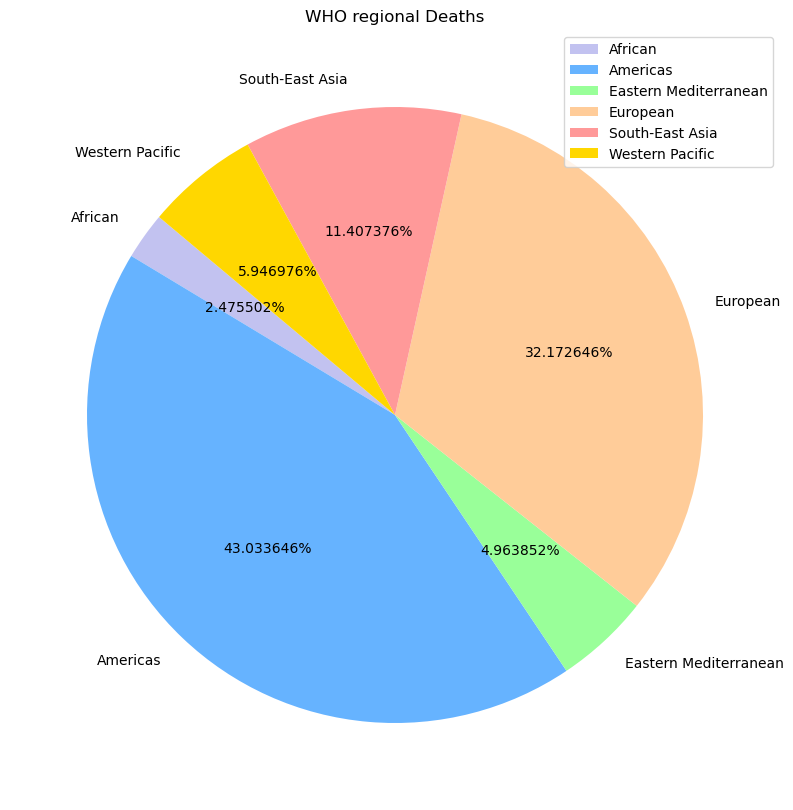

In [13]:
s_colors = ['#C2C2F0', '#66B3FF', '#99FF99', '#FFCC99', '#FF9999', '#FFD700']
plt.figure(figsize=(10, 10))
    
plt.pie(s_Continental_deaths.values(), labels= s_Continental_deaths.keys(), colors=s_colors, autopct=s_autopct_format, startangle=140)
plt.title("WHO regional Deaths")
plt.legend()
plt.show()

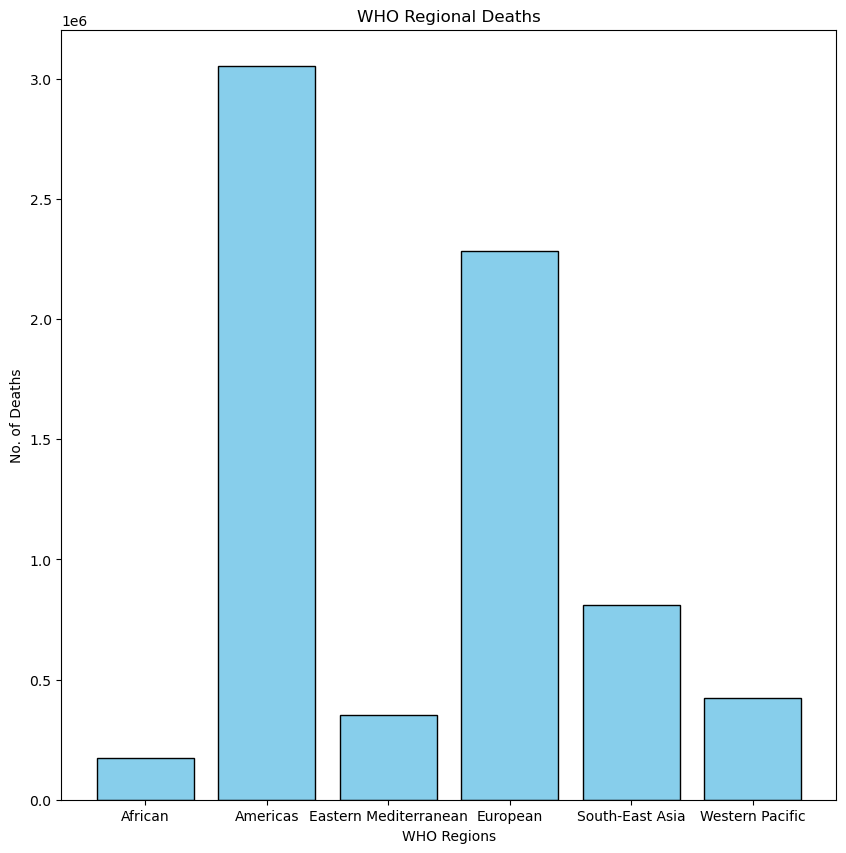

In [14]:
plt.figure(figsize=(10, 10))
    
plt.bar(s_Continental_deaths.keys(), s_Continental_deaths.values(), color='skyblue', edgecolor='black')
plt.title("WHO Regional Deaths")
plt.xlabel("WHO Regions")
plt.ylabel("No. of Deaths")
plt.show()

The pie charts and bar graphs reveal that the European Region (EURO) recorded the highest number of cases (36.16%), followed closely by the Western Pacific Region (26.83%) and the Region of the Americas (24.88%). However, despite having the most reported cases, Europe did not have the highest number of deaths. Instead, the Region of the Americas accounted for the largest share of global COVID-19 deaths (43.03%), surpassing Europe, which reported 32.17% of total deaths. This suggests that while Europe had more infections, the mortality rate in the Americas was higher, likely due to differences in healthcare infrastructure, disease severity, and access to medical interventions. A key observation is that the African Region consistently had the lowest number of reported cases (1.23%) and deaths (2.48%). Another interesting trend is seen in the Western Pacific Region (WPRO), which had a significant proportion of cases (26.83%) but only 5.95% of deaths. This suggests that early containment measures, high vaccination rates, and strong healthcare systems in countries like China, Japan, and Australia contributed to a lower fatality rate.

From these observations, it is clear that higher case numbers did not always correlate with higher deaths, as seen in the case of Europe (high cases, moderate deaths) and the Americas (moderate cases, highest deaths). The variations in mortality rates across regions highlight the crucial role of healthcare infrastructure, pandemic response strategies, testing capacity, and demographic factors in shaping the outcomes of the pandemic. Now let us look into the Central Tendencies and Dispersions for each of the WHO regions w.r.t to country.

In [15]:
h_who_region = h_data["WHO Region"]
h_countries,counts=np.unique(h_who_region,return_counts=True)
print("Central Tendencies and Dispersion for each WHO Region\n")
for country in h_countries:
    print(country,":")
    country_data = h_data[h_data["WHO Region"]==country]
    stats_display(country_data)

Central Tendencies and Dispersion for each WHO Region

Africa :


Metric,Mean,Median,Variance,Standard Deviation,Minimum,Maximum,Range,Quartile 1,Quartile 3,Interquartile Range
Total Cases,191752.44,59227.5,3.237058e+11,568951.53,2166.0,4072925.0,4070759.0,19693.75,172291.25,152597.50
Total Deaths,3510.64,789.0,2.037073e+08,14272.61,0.0,102595.0,102595.0,188.75,1973.50,1784.75
Cases per 100K,5135.12,505.5,1.442358e+08,12009.82,39.0,55243.0,55204.0,288.75,1875.25,1586.50
Deaths per 100K,29.18,7.5,2.175510e+03,46.64,0.0,175.0,175.0,3.00,21.75,18.75


Americas :


Metric,Mean,Median,Variance,Standard Deviation,Minimum,Maximum,Range,Quartile 1,Quartile 3,Interquartile Range
Total Cases,3582021.20,90274.0,2.168152e+14,14724647.46,1403.0,103436829.0,103435426.0,16101.0,1071433.00,1055332.00
Total Deaths,56507.67,940.5,3.729506e+10,193119.28,0.0,1218325.0,1218325.0,126.0,9224.25,9098.25
Cases per 100K,21548.91,17689.5,2.545220e+08,15953.75,0.0,61384.0,61384.0,9562.0,29588.00,20026.00
Deaths per 100K,175.78,178.5,1.353458e+04,116.34,0.0,670.0,670.0,103.0,235.75,132.75


Eastern Mediterranean :


Metric,Mean,Median,Variance,Standard Deviation,Minimum,Maximum,Range,Quartile 1,Quartile 3,Interquartile Range
Total Cases,1064450.50,681952.0,2.439708e+12,1561956.53,11945.0,7627863.0,7615918.0,276272.75,1218268.25,941995.50
Total Deaths,15998.86,6072.5,9.041077e+08,30068.38,189.0,146837.0,146648.0,2404.25,15759.25,13355.00
Cases per 100K,8383.64,6756.0,8.977456e+07,9474.94,40.0,40939.0,40899.0,632.00,13036.00,12404.00
Deaths per 100K,67.09,36.0,4.073540e+03,63.82,7.0,249.0,242.0,19.50,93.25,73.75


Europe :


Metric,Mean,Median,Variance,Standard Deviation,Minimum,Maximum,Range,Quartile 1,Quartile 3,Interquartile Range
Total Cases,4534577.74,1347246.5,7.419639e+13,8613732.71,0.0,39015118.0,39015118.0,184003.00,4740478.50,4556475.50
Total Deaths,36794.94,10001.5,4.896375e+09,69974.11,0.0,404239.0,404239.0,1014.50,29003.00,27988.50
Cases per 100K,36230.63,36973.5,4.550782e+08,21332.56,0.0,80260.0,80260.0,17253.25,54540.25,37287.00
Deaths per 100K,238.15,228.0,2.021461e+04,142.18,0.0,558.0,558.0,133.00,340.25,207.25


South-East Asia :


Metric,Mean,Median,Variance,Standard Deviation,Minimum,Maximum,Range,Quartile 1,Quartile 3,Interquartile Range
Total Cases,5575373.09,672812.0,1.602724e+14,12659875.23,0.0,45044607.0,45044607.0,124695.5,3430965.5,3306270.0
Total Deaths,73533.64,16907.0,2.313337e+10,152096.59,0.0,533662.0,533662.0,227.0,32121.0,31894.0
Cases per 100K,6009.91,3142.0,8.671056e+07,9311.85,0.0,34538.0,34538.0,1512.5,5168.0,3655.5
Deaths per 100K,35.73,39.0,5.887400e+02,24.26,0.0,79.0,79.0,14.0,54.0,40.0


Western Pacific :


Metric,Mean,Median,Variance,Standard Deviation,Minimum,Maximum,Range,Quartile 1,Quartile 3,Interquartile Range
Total Cases,5960308.17,46864.0,3.231427e+14,17976171.21,4.0,99381761.0,99381757.0,7867.0,1839862.5,1831995.5
Total Deaths,12048.17,199.0,7.194780e+08,26823.09,0.0,122398.0,122398.0,13.5,2596.0,2582.5
Cases per 100K,25613.91,26035.0,4.375234e+08,20917.06,524.0,80130.0,79606.0,7228.5,34327.0,27098.5
Deaths per 100K,53.57,42.0,3.255730e+03,57.06,0.0,248.0,248.0,10.0,70.5,60.5


The statistical analysis of COVID-19 cases and deaths across WHO regions reveals significant differences in the impact of the pandemic on various parts of the world. The Western Pacific, South-East Asia, and Europe recorded the highest mean of total cases per country, with Europe having the highest number of cases per 100,000 population (36,230), followed by the Western Pacific (25,613) and the Americas (21,548). This indicates that these regions experienced widespread transmission, either due to high population density, increased testing capacity, or prolonged outbreaks. In contrast, Africa reported the lowest number of total cases and cases per 100,000 (5,135). 

In the Examination of total deaths, the Region of Americas had the highest average deaths per country (56,507), followed by South-East Asia (73,533) and Europe (36,794). However, when adjusted for population, Europe (238 deaths per 100,000) and the Americas (175 deaths per 100,000) had the highest mortality rates, confirming that these regions experienced the highest burden of COVID-19 fatalities. Despite having a significant share of global cases, the Western Pacific had a lower mortality rate (53.57 deaths per 100,000).

The variability in data across regions further emphasizes the uneven distribution of the pandemic's impact. The Western Pacific and Americas exhibited the highest variance in case numbers, indicating large disparities among countries within these regions. In contrast, Africa had the lowest variance, meaning that most countries in this region reported consistently low case numbers. Additionally, the high interquartile range (IQR) values across all regions, particularly in South-East Asia, Europe, and the Americas, suggest that a few countries contributed disproportionately to total cases and deaths.

Overall, the data confirms that COVID-19 had an uneven impact across WHO regions.

# Timely Analysis across the World
## Yearly Analysis
Now lets analyse the trends of number cases and deaths reported across the years 2020, 2021, 2022, 2023, 2024

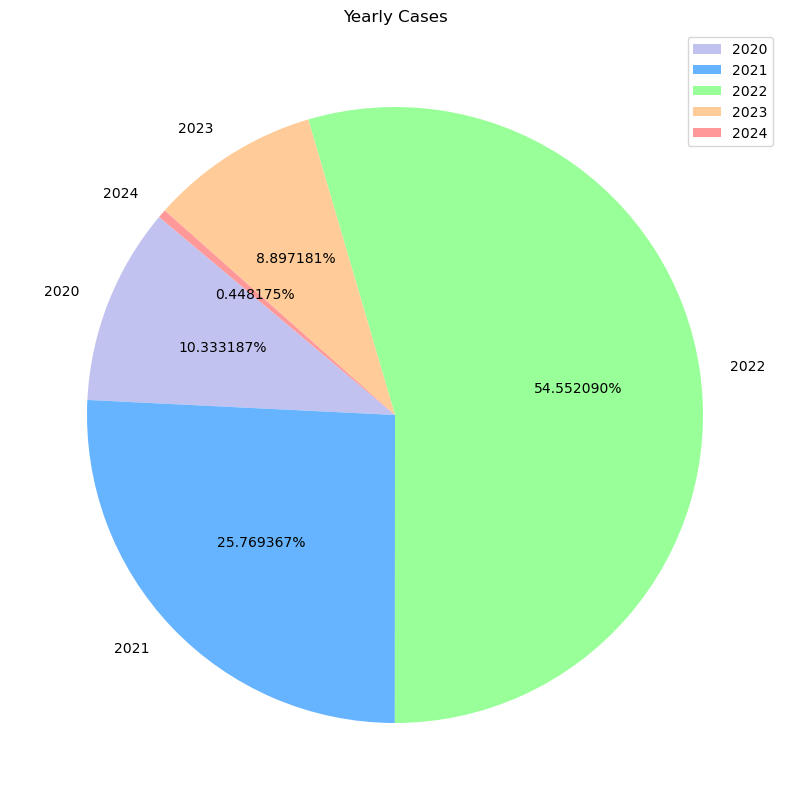

In [16]:
s_colors = ['#C2C2F0', '#66B3FF', '#99FF99', '#FFCC99', '#FF9999']
plt.figure(figsize=(10, 10))
    
plt.pie(s_yearly_cases.values(), labels= s_yearly_cases.keys(), colors=s_colors, autopct=s_autopct_format, startangle=140)
plt.title("Yearly Cases")
plt.legend()
plt.show()

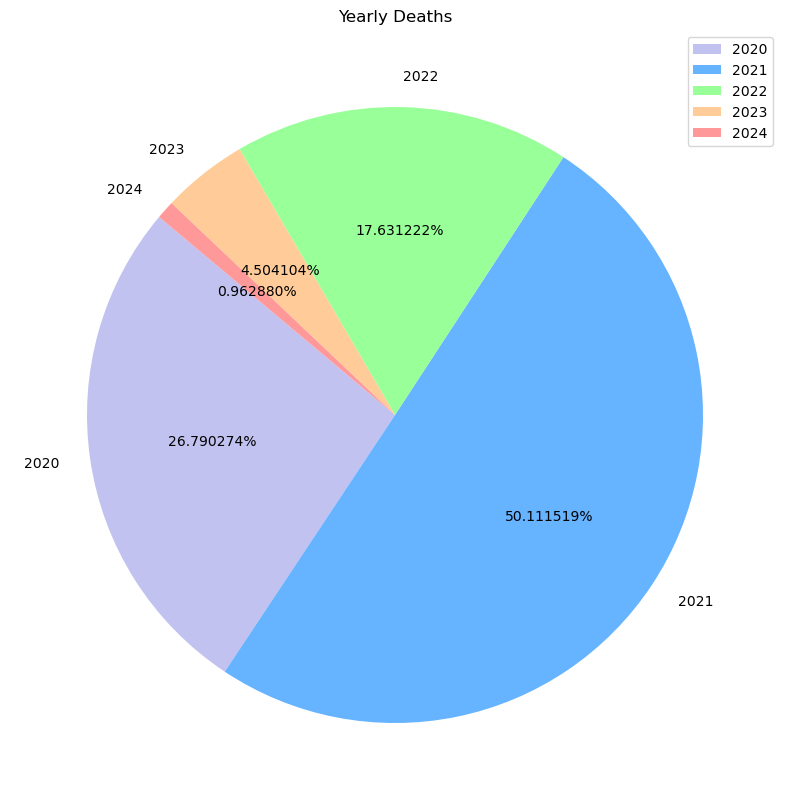

In [17]:
s_colors = ['#C2C2F0', '#66B3FF', '#99FF99', '#FFCC99', '#FF9999']
plt.figure(figsize=(10, 10))
    
plt.pie(s_yearly_deaths.values(), labels= s_yearly_deaths.keys(), colors=s_colors, autopct=s_autopct_format, startangle=140)
plt.title("Yearly Deaths")
plt.legend()
plt.show()

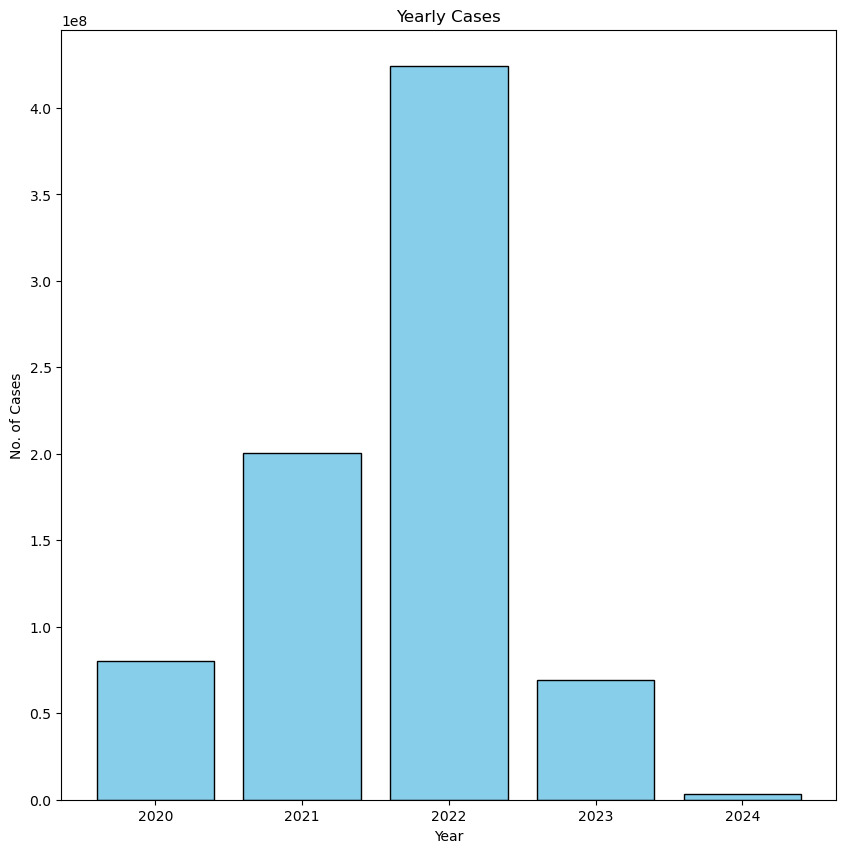

In [18]:
plt.figure(figsize=(10, 10))
    
plt.bar(s_yearly_cases.keys(), s_yearly_cases.values(), color='skyblue', edgecolor='black')
plt.title("Yearly Cases")
plt.xlabel("Year")
plt.ylabel("No. of Cases")
plt.show()

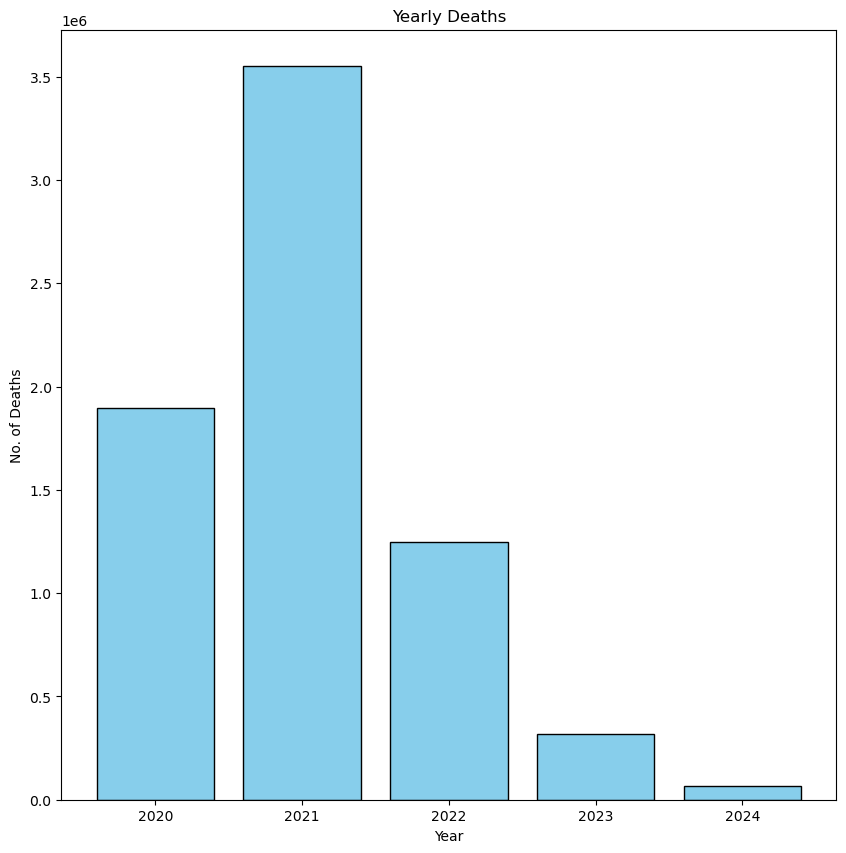

In [19]:
plt.figure(figsize=(10, 10))
    
plt.bar(s_yearly_deaths.keys(), s_yearly_deaths.values(), color='skyblue', edgecolor='black')
plt.title("Yearly Deaths")
plt.xlabel("Year")
plt.ylabel("No. of Deaths")
plt.show()

The yearly analysis of COVID-19 cases and deaths worldwide provides a clear picture of how the pandemic evolved over time. The distribution of COVID-19 cases by year shows that 2022 had the highest percentage of reported cases (54.55%), followed by 2021 (25.77%) and 2020 (10.33%) but the yearly distribution of deaths, however, presents a different pattern. 2021 recorded the highest percentage of deaths (50.11%), followed by 2020 (26.79%) and 2022 (17.63%).

This suggests that the deadliest phase of the pandemic occurred in 2020 and 2021, likely due to limited medical knowledge, lack of vaccines, and overwhelmed healthcare systems. By 2022, the death rate had significantly decreased, even though it had the highest number of reported cases, indicating improved medical treatments, widespread vaccinations, and better pandemic management strategies. The year 2023 accounted for 8.90% of cases, while 2024 contributed a negligible 0.45%, indicating that the pandemic had largely subsided by then. 

Overall, this analysis highlights the shifting nature of the pandemic, where early years (2020-2021) were characterized by high mortality rates, while later years (2022 onward) saw a higher number of cases but fewer deaths due to medical advancements and public health interventions.

In [20]:
for year in np.arange(2020, 2025):
    globals()[f'df_{year}'] = filter_year_data(df, year)
    print(f"{year}:")
    stats_display2(globals()[f'df_{year}'])

2020:


Metric,Mean,Median,Variance,Standard Deviation,Minimum,Maximum,Range,Quartile 1,Quartile 3,Interquartile Range
New Cases,1544553.65,1243382.0,1.999367e+12,1413989.62,2.0,4542432.0,4542430.0,437566.0,2111303.50,1673737.50
New Deaths,36491.02,38460.5,5.563663e+08,23587.42,1.0,85690.0,85689.0,30597.5,44794.25,14196.75


2021:


Metric,Mean,Median,Variance,Standard Deviation,Minimum,Maximum,Range,Quartile 1,Quartile 3,Interquartile Range
New Cases,3851877.38,3794807.0,8.196227e+11,905330.17,2474264.0,6090327.0,3616063.0,3084749.0,4446417.50,1361668.50
New Deaths,68256.88,66483.0,2.636200e+08,16236.38,46088.0,103719.0,57631.0,54426.0,80658.25,26232.25


2022:


Metric,Mean,Median,Variance,Standard Deviation,Minimum,Maximum,Range,Quartile 1,Quartile 3,Interquartile Range
New Cases,8154176.71,5023926.5,5.656886e+13,7521227.17,2334637.0,44236227.0,41901590.0,3357609.75,10924757.75,7567148.0
New Deaths,24015.48,14677.5,3.920551e+08,19800.38,8837.0,76455.0,67618.0,10844.25,28598.75,17754.5


2023:


Metric,Mean,Median,Variance,Standard Deviation,Minimum,Maximum,Range,Quartile 1,Quartile 3,Interquartile Range
New Cases,1304813.83,340117.0,1.598337e+13,3997921.33,120576.0,27732700.0,27612124.0,201467.0,799538.0,598071.0
New Deaths,6019.28,2787.0,1.066624e+08,10327.75,932.0,69688.0,68756.0,2274.0,5621.0,3347.0


2024:


Metric,Mean,Median,Variance,Standard Deviation,Minimum,Maximum,Range,Quartile 1,Quartile 3,Interquartile Range
New Cases,66990.98,56243.0,1.232444e+09,35106.18,31481.0,200489.0,169008.0,45336.25,78904.75,33568.50
New Deaths,1311.54,1046.5,7.208783e+05,849.05,492.0,4279.0,3787.0,746.25,1492.00,745.75


In 2020, the virus spread rapidly, with an average of 1.54 million new cases and 36,491 deaths per week. By 2021, weekly cases surged to 3.85 million, and weekly deaths peaked at 68,256, making it the deadliest year. The highest weekly cases were recorded in 2022 (8.15 million per week), but weekly deaths dropped to 24,015, reflecting the impact of vaccines and improved treatments. In 2023, cases declined sharply to 1.3 million per week, and by 2024, COVID-19 was largely under control, with only 66,990 cases and 1,311 deaths per week. This decline confirms COVID-19’s transition from a global crisis to an end phase.

## Weekly Anaylysis

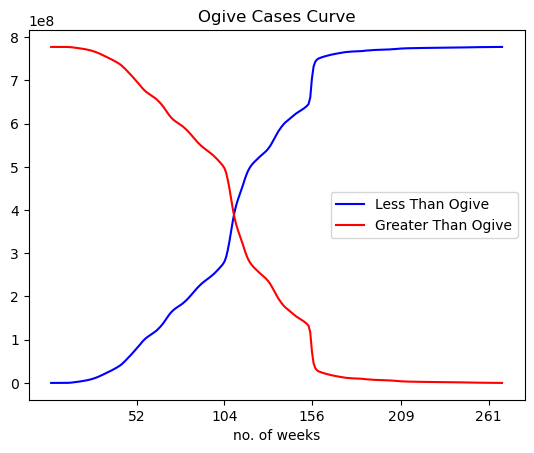

In [21]:
plt.plot(s_weeks, s_cweek_cases, linestyle='-', color='b', label="Less Than Ogive")
plt.plot(s_weeks, s_greater_than_cases, linestyle='-', color='r', label="Greater Than Ogive")
plt.xticks(list(s_ccount.values()))
plt.xlabel("no. of weeks")
plt.title("Ogive Cases Curve")
plt.legend()
plt.show()
# print(s_ticks.tolist())

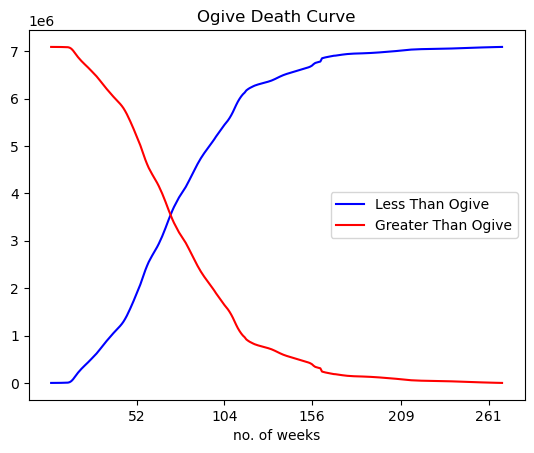

In [22]:
plt.plot(s_weeks, s_cweek_deaths, linestyle='-', color='b', label="Less Than Ogive")
plt.plot(s_weeks, s_greater_than_deaths, linestyle='-', color='r', label="Greater Than Ogive")
plt.xticks(list(s_ccount.values()))
plt.xlabel("no. of weeks")
plt.legend()
plt.title("Ogive Death Curve")
plt.show()

In both graphs, we observe a steep rise in cases and deaths in the first half of the pandemic, indicating rapid transmission and high fatality rates during the early waves. In the year  2021 (between the week 52 and 104), the two curves intersect, signifying that more than half of the total cases and deaths had already occurred by that time. The sudden rise in the "Less Than Ogive" for cases around week 156, this aligns with the massive global wave observed in early 2022, where Omicron and its subvariants led to record-breaking case numbers in multiple region. After this peak, the greater than ogive declines sharply, while the less than ogive flattens, showing that the rate of new infections and deaths slowed significantly in the later weeks.

# Global Analysis of the Pandemic
Now, let us analyse the cumulative data of number of cases and number of deaths across different countries. Starting with box plots

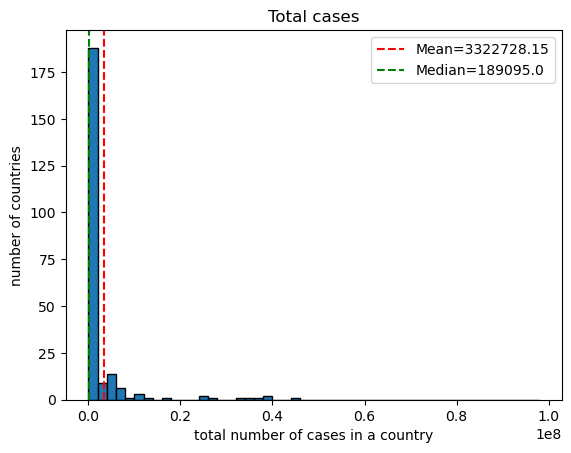

In [23]:

plt.hist(a_total_cases,bins=a_total_cases_bins,edgecolor='black')
plt.axvline(np.mean(a_total_cases),color='red',label=f'Mean={round(np.mean(a_total_cases),2)}',linestyle='--')
plt.axvline(np.median(a_total_cases),color='green',label=f'Median={np.median(a_total_cases)}',linestyle='--')
plt.legend()
plt.title('Total cases')
plt.xlabel('total number of cases in a country')
plt.ylabel('number of countries')
plt.show()

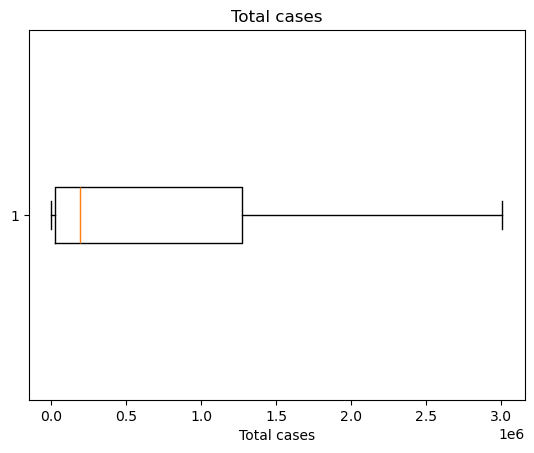

In [24]:
plt.boxplot(h_total_cases,showfliers=False,vert=False)
plt.title("Total cases")
plt.xlabel("Total cases")
plt.show()

In the above box plot and Histogram on Total Cases shows a right-skewed distribution, indicating that while most countries had relatively lower case numbers, a few countries experienced extremely high cumulative infections, pulling the upper whisker far to the right. The median lies closer to the lower quartile, confirming that a majority of countries had significantly fewer cases compared to the highest-reporting nations.

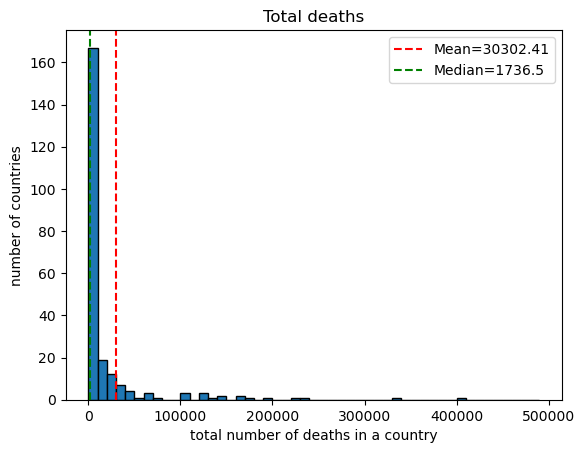

In [25]:

plt.hist(a_total_deaths,bins=a_total_deaths_bins,edgecolor='black')
plt.axvline(np.mean(a_total_deaths),color='red',label=f'Mean={round(np.mean(a_total_deaths),2)}',linestyle='--')
plt.axvline(np.median(a_total_deaths),color='green',label=f'Median={np.median(a_total_deaths)}',linestyle='--')
plt.legend()
plt.title('Total deaths')
plt.xlabel('total number of deaths in a country')
plt.ylabel('number of countries')
plt.show()

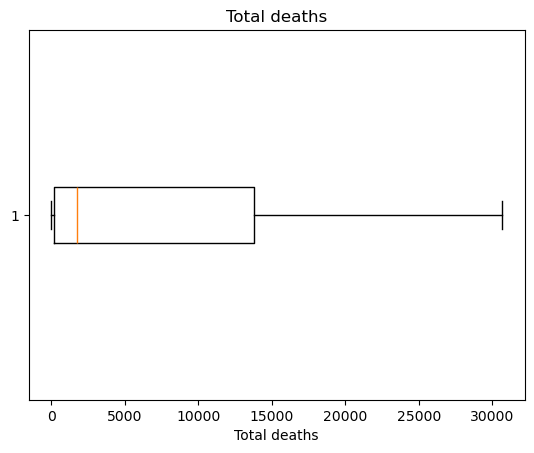

In [26]:
plt.boxplot(h_total_deaths,showfliers=False,vert=False)
plt.title("Total deaths")
plt.xlabel("Total deaths")
plt.show()

We can observe a similar pattern in the Total Deaths box plot and histogram as that of total cases, where the spread of fatalities is wide, with some countries reporting substantially higher cumulative deaths. The long right whisker suggests the presence of outliers (nations that faced disproportionately high mortality rates).

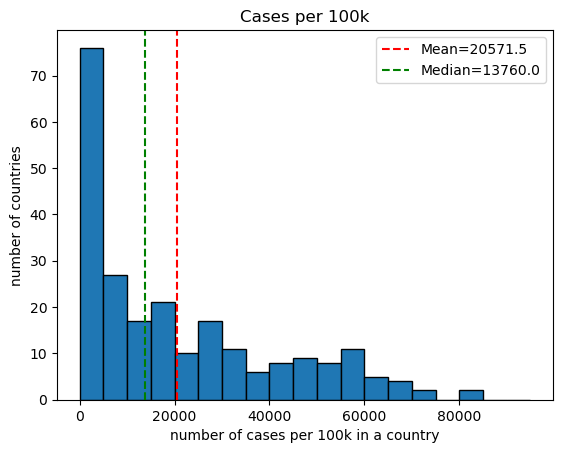

In [27]:

plt.hist(a_cases_per_100k,bins=a_cases_per_100k_bins,edgecolor='black')
plt.axvline(np.mean(a_cases_per_100k),color='red',label=f'Mean={round(np.mean(a_cases_per_100k),2)}',linestyle='--')
plt.axvline(np.median(a_cases_per_100k),color='green',label=f'Median={np.median(a_cases_per_100k)}',linestyle='--')
plt.legend()
plt.xlabel('number of cases per 100k in a country')
plt.ylabel('number of countries')
plt.title('Cases per 100k')
plt.show()


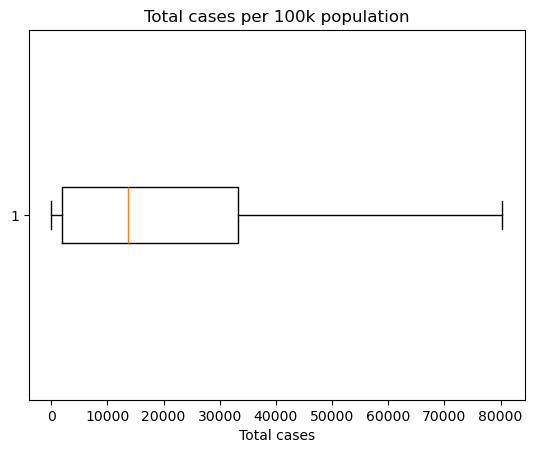

In [28]:
plt.boxplot(h_per100_cases,showfliers=False,vert=False)
plt.title("Total cases per 100k population")
plt.xlabel("Total cases")
plt.show()

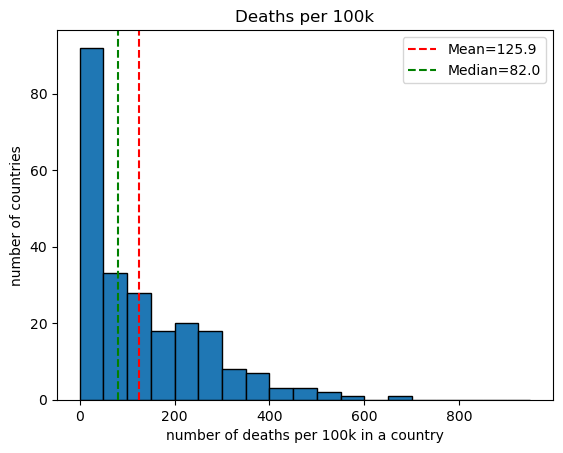

In [29]:

plt.hist(a_deaths_per_100k,bins=a_deaths_per_100k_bins,edgecolor='black')
plt.axvline(np.mean(a_deaths_per_100k),color='red',label=f'Mean={round(np.mean(a_deaths_per_100k),2)}',linestyle='--')
plt.axvline(np.median(a_deaths_per_100k),color='green',label=f'Median={np.median(a_deaths_per_100k)}',linestyle='--')
plt.legend()
plt.xlabel('number of deaths per 100k in a country')
plt.ylabel('number of countries')
plt.title('Deaths per 100k')
plt.show()

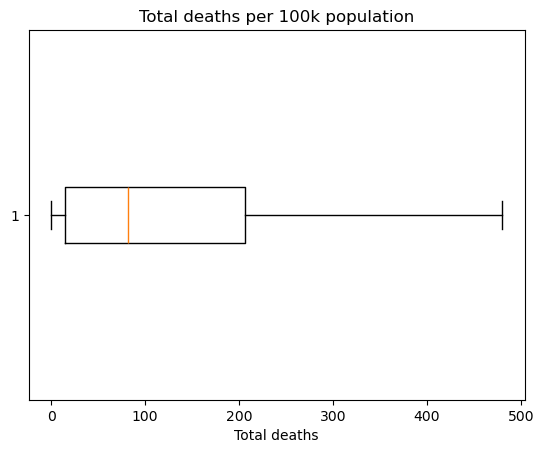

In [30]:
plt.boxplot(h_per100_deaths,showfliers=False,vert=False)
plt.title("Total deaths per 100k population")
plt.xlabel("Total deaths")
plt.show()

When adjusted for population size, the Total Cases per 100,000 population and Total Deaths per 100,000. The cases per 100k and deaths per 100k histograms provide a population-adjusted perspective, revealing that while some countries experienced relatively mild outbreaks, others had exceptionally high infection and mortality rates. The long tails in these distributions indicate that some countries faced severe outbreaks with high per capita infections and fatalities, while most nations remained in the lower to mid-range of the distribution. population box plots reveal further insights. The wide interquartile range (IQR) in cases per 100,000 suggests considerable variation in infection rates across countries, influenced by factors such as testing availability, containment measures, and vaccination campaigns. The Total Deaths per 100,000 population plot also exhibits a large spread, indicating that some countries experienced significantly higher fatality rates relative to their population size.

Now, the statistical analysis of cumulative COVID-19 cases and deaths across countries, combined with the box plots and histograms, reveals a highly skewed distribution of the pandemic’s impact worldwide.

In [31]:
print("Central Tendencies and Dispersion for the data")
stats_display(h_data)

Central Tendencies and Dispersion for the data


Metric,Mean,Median,Variance,Standard Deviation,Minimum,Maximum,Range,Quartile 1,Quartile 3,Interquartile Range
Total Cases,3322728.15,189095.0,1.301170e+14,11406885.60,0.0,103436829.0,103436829.0,25316.25,1272514.50,1247198.25
Total Deaths,30302.41,1736.5,1.170744e+10,108200.92,0.0,1218325.0,1218325.0,173.25,13768.25,13595.00
Cases per 100K,20571.50,13760.0,4.319313e+08,20782.96,0.0,80260.0,80260.0,1913.25,33269.00,31355.75
Deaths per 100K,125.90,82.0,1.724290e+04,131.31,0.0,670.0,670.0,14.25,206.00,191.75


The total cases per country show extreme variability, with an average of 3.32 million cases, but a median of only 189,095, indicating that most countries had significantly lower cases compared to a few heavily affected nations. The maximum number of reported cases reached 103 million, creating a long right tail in both the histogram and box plot. This suggests that a small number of countries accounted for the majority of global infections, while most had much lower totals. The high variance and standard deviation (11.4 million cases) further supports the uneven distribution of the virus worldwide. Similarly, the total deaths per country exhibit a highly skewed pattern, with a mean of 30,302 deaths per country but a median of only 1,736. The maximum number of reported deaths in a single country exceeded 1.2 million, contributing to significant outliers in the box plot and histogram. The wide interquartile range (13,595 deaths) highlights the disparities in death tolls across countries.

The cases per 100,000 population further emphasize the disparity in infection rates among countries. The mean number of cases per 100K population is 20,571, while the median is 13,760, again showing that a few countries experienced exceptionally high infection rates compared to the global values. A similar pattern is observed in deaths per 100K population, where the mean (125.9 deaths per 100K) is notably higher than the median (82.0 deaths per 100K), confirming the presence of extreme values. The maximum death rate reached 670 per 100K, creating a right-skewed distribution in the histogram and a long whisker in the box plot. This suggests that while some countries maintained lower mortality rates, others faced devastating death tolls relative to their population sizes.

Overall, these visualizations confirm that COVID-19’s impact was not uniform across countries. While some nations effectively controlled the virus, others experienced devastating outbreaks that accounted for a disproportionate share of global cases and deaths. 

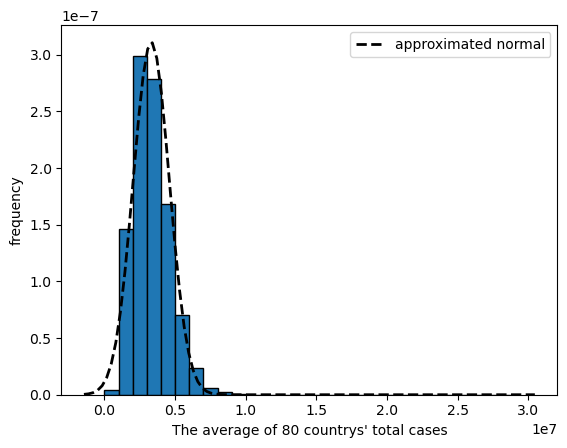

In [32]:
a_total_cases_CLT_size=80
a_total_cases_bins1=[i for i in np.arange(0,30000000,1000000)]
a_random_selection_total_cases=[np.mean(np.random.choice(a_total_cases,size=a_total_cases_CLT_size,replace=True)) for i in np.arange(0,5000)]
plt.hist(a_random_selection_total_cases,bins=a_total_cases_bins1,edgecolor='black',density=True)
mu, std = norm.fit(a_random_selection_total_cases)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k',linestyle='--', linewidth=2,label="approximated normal")
plt.legend()
plt.xlabel(f'The average of {a_total_cases_CLT_size} countrys\' total cases')
plt.ylabel('frequency')
plt.show()

Text(0, 0.5, 'frequency')

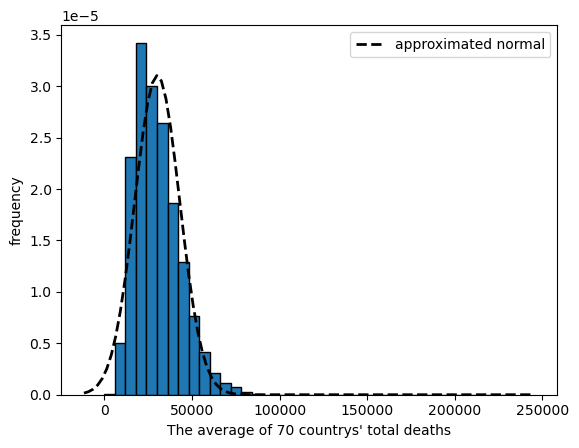

In [33]:
a_total_deaths_CLT_size=70
a_total_deaths_bins1=[i for i in np.arange(0,240000,6000)]
random_selection_total_deaths=[np.mean(np.random.choice(a_total_deaths,size=a_total_deaths_CLT_size,replace=True)) for i in np.arange(0,5000)]
plt.hist(random_selection_total_deaths,bins=a_total_deaths_bins1,edgecolor='black',density=True)
mu, std = norm.fit(random_selection_total_deaths)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k',linestyle='--', linewidth=2,label="approximated normal")
plt.legend()
plt.xlabel(f'The average of {a_total_deaths_CLT_size} countrys\' total deaths')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

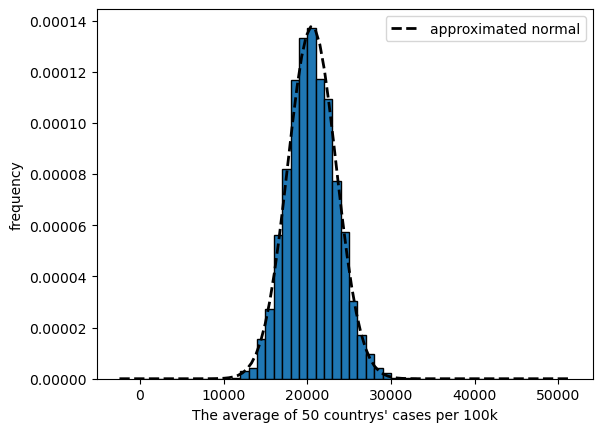

In [35]:
a_cases_per_100k_CLT_size=50
a_cases_per_100k_bins1=[i for i in np.arange(0,50000,1000)]
random_selection_cases_per_100k=[np.mean(np.random.choice(a_cases_per_100k,size=a_cases_per_100k_CLT_size,replace=True)) for i in np.arange(0,5000)]
plt.hist(random_selection_cases_per_100k,bins=a_cases_per_100k_bins1,edgecolor='black',density=True)
mu, std = norm.fit(random_selection_cases_per_100k)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k',linestyle='--', linewidth=2,label="approximated normal")
plt.legend()
plt.xlabel(f'The average of {a_cases_per_100k_CLT_size} countrys\' cases per 100k')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

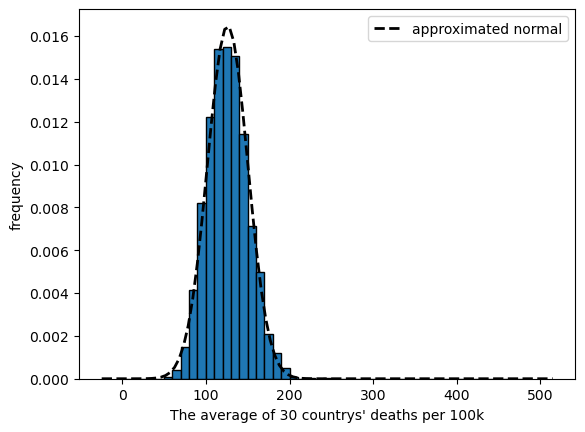

In [36]:
a_deaths_per_100k_CLT_size=30
a_deaths_per_100k_bins1=[i for i in np.arange(0,500,10)]
random_selection_deaths_per_100k=[np.mean(np.random.choice(a_deaths_per_100k,size=a_deaths_per_100k_CLT_size,replace=True)) for i in np.arange(0,5000)]
plt.hist(random_selection_deaths_per_100k,bins=a_deaths_per_100k_bins1,edgecolor='black',density=True)
mu, std = norm.fit(random_selection_deaths_per_100k)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k',linestyle='--', linewidth=2,label="approximated normal")
plt.legend()
plt.xlabel(f'The average of {a_deaths_per_100k_CLT_size} countrys\' deaths per 100k')
plt.ylabel('frequency')